# ----- THIS IS A DRAFT ------

# Reduced Representation Sequencing (RADseq/GBS) 

This notebook contains code snippits to address points outlined in document : RADpage_text.Rmd

In [2]:
library(ggplot2)
library(dplyr)
library(SeqArray)
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("SeqVarTools") # **TODO** dani to add this to dockerfile 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: gdsfmt

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: http://cran.us.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.3 (2020-10-10)

Installing package(s) 'SeqVarTools'

also installing the dependencies ‘operator.tools’, ‘mice’, ‘formula.tools’, ‘Biobase’, ‘GWASExactHW’, ‘logistf’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'blob', 'broom', 'cli', 'colorspace', 'cpp11', 'credentials',
  'curl', 'dplyr', 'forecast', 'furrr', 'gargle', 'gert', 'ggplot2',
  'googledrive', 'googlesheets4', 'hardhat', 'IRkernel', 'isoband', 'jpeg',
  'mime', 'modeldata', 'parallelly', 'parsnip', 'proxy', 'Rcpp',
  'RcppArm

## Considerations Before Lab Work -- Setting up for Success {#labwork} 
Randomize samples!  
Make a metadata file with all the potential batch effect sources.  
Have sample replicates across all plates

In [1]:
# This code reads in a STRATA/meta-data file, randomises samples, and returns a file with wells, plates and duplicates which may be used to assit with plating libraries
# ** TODO** will need to consider where to duplicate samples - need to consider STARTA, DOC, ect..?

wells = 96 # how many wells can you use on your plate? 
data.in = read.table("../data/example.metadata", sep = "\t", header = T) # each sample should be in its own ROW
l = length(data.in[,1])
plates = rep(1:length(ceiling(101/ wells)), wells)
data.out = cbind(
   data.in[sample(1:l, l, replace = F),], # randomise samples
   PLATEID = plates[c(1:l)],  # add plate info 
   WELLID = rep(1:wells, length(unique(plates)))[1:l] # add well info
) # add duplicates **TODO**

# print example
 print(head(data.out))

   TARGET_ID INDIVIDUALS STRATA       LAT     LONG PLATEID WELLID
8      CM053       CM053   ECSI -45.33900 171.3927       1      1
79     CM213       CM213     SA        NA       NA       1      2
68     CM065       CM065   ECSI -44.76150 171.2648       1      3
46     CM157       CM157   WCSI -42.39000 170.4200       1      4
12     CM204       CM204     SA        NA       NA       1      5
16     CM069       CM069   ECSI -45.23983 171.4100       1      6


# clustering code 
#Below we use the methods outlined in  ?? https://doi.org/10.1111/1755-0998.13029 ?? and implemented in [clustOpt](https://github.com/atcg/clustOpt). 
#** TODO ** get the labels to include plate number if we make a STRATA file so its easier to see if data from certian plates/libraries are grouping together. 



**TODO** 
Need to work on this, becuase it doesnt work for all vcf types

Steps for setup:
Make a list of vcf files to analyze in vcf.list. Should include the paths to all VCF files you want to analyse (one per line)

You'll need:

    VCF files
    A list of VCF file names, single column, one name per row, saved as " vcf.list "
    Lat and Longs for each sample in decimal degrees.The format should be tab-delimated with the following column headers, Sample Lat Long. For Stepx and x only (not all steps need it if you don't have it)



%%sh

perl clustOpt/vcfMissingness.pl --vcflist data/vcf.list # missingness heatmaps

Rscript clustOpt/ibdSlope.R data/vcf.list data/lat.long.tsv # ibs slopes

clustOpt/vcfToPCAvarExplained.R data/vcf.list N



                             FileName ReadOnly  State
1 /home/jovyan/work/data/test.gds.rad     TRUE closed


File: /home/jovyan/work/data/test.gds.rad (19.4M)
+    [  ] *
|--+ description   [  ] *
|--+ sample.id   { Str8 93 ZIP_ra(30.6%), 178B }
|--+ variant.id   { Int32 35559 ZIP_ra(34.6%), 48.1K }
|--+ position   { Str8 35559 ZIP_ra(34.9%), 35.3K }
|--+ chromosome   { Str8 35559 ZIP_ra(0.16%), 468B }
|--+ allele   { Str8 35559 ZIP_ra(17.8%), 24.7K }
|--+ phase   [  ]
|--+ annotation   [  ]
|  |--+ id   { Str8 35559 ZIP_ra(15.4%), 49.7K }
|  |--+ qual   { Float32 0 ZIP_ra, 16B } *
|  |--+ filter   { Int32 0 ZIP_ra, 16B } *
|  |--+ info   [  ]
|  |  \--+ NS       
|  \--+ format   [  ]
|--+ sample.annotation   [  ]
|--+ genotype   [  ] *
|  \--+ data   { Bit2 2x93x35559 ZIP_ra(28.7%), 463.1K }
\--+ radiator   [  ]
   |--+ data.source   { Str8 2 ZIP_ra(263.6%), 36B }
   |--+ reference.genome   { Int32,logical 1 ZIP_ra(550.0%), 29B } *
   |--+ biallelic   { Int32,logical 1 ZIP_ra(550.0%), 29B } *
   |--+ id.clean       
   |--+ individuals.meta   [ tbl_df,tbl,data.frame,list ] *
   |  |--+ TARG

[1] "The number of SAMPLES in data: 93"
[1] "The number of SNPs in data: 35559"
Principal Component Analysis (PCA) on genotypes:
Calculating allele counts/frequencies ...
# of selected variants: 19,341
Excluding 16,218 SNVs (monomorphic: TRUE, MAF: 0.03, missing rate: NaN)
    # of samples: 93
    # of SNVs: 19,341
    using 2 threads
    # of principal components: 32
CPU capabilities: Double-Precision SSE2
Mon Jul 26 20:43:53 2021    (internal increment: 15104)
[==================================================] 100%, completed, 0s  
Mon Jul 26 20:43:53 2021    Begin (eigenvalues and eigenvectors)
Mon Jul 26 20:43:53 2021    Done.


Too few points to calculate an ellipse

Too few points to calculate an ellipse

Too few points to calculate an ellipse

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


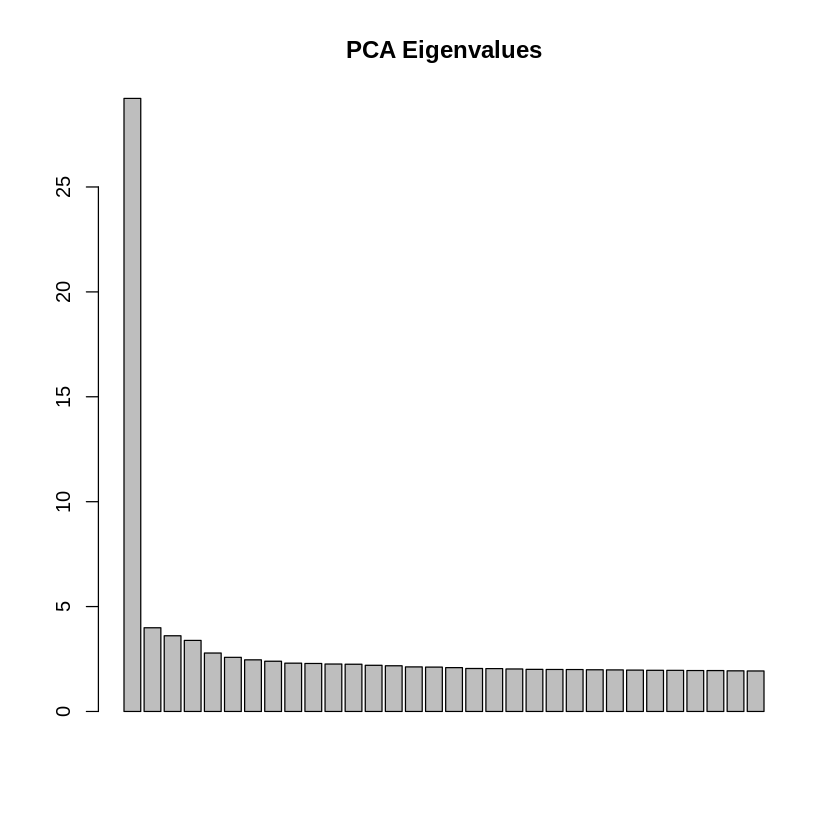

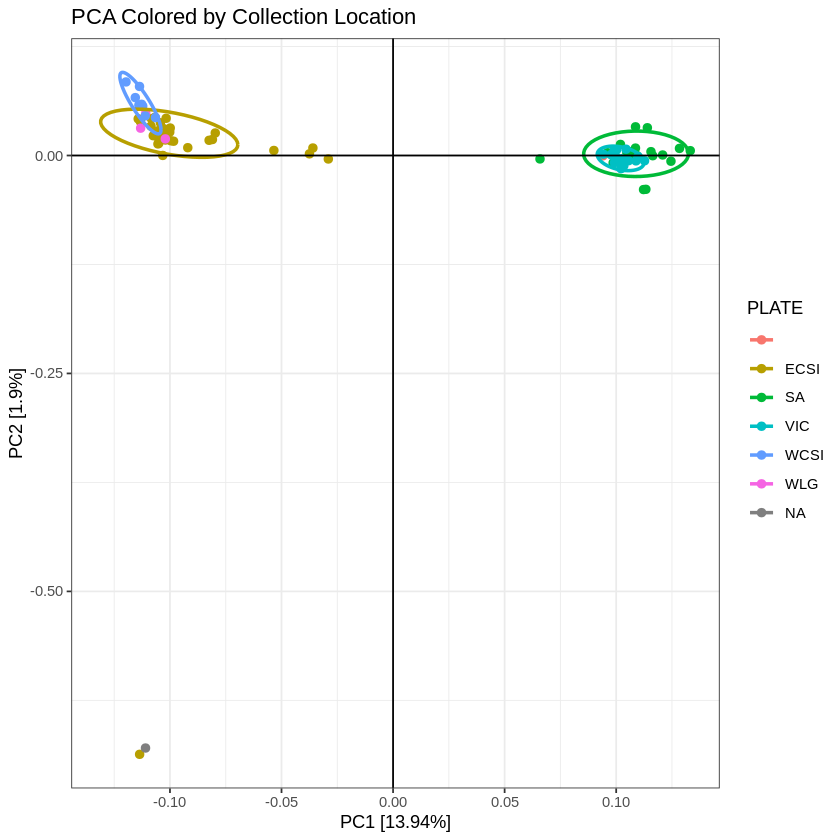

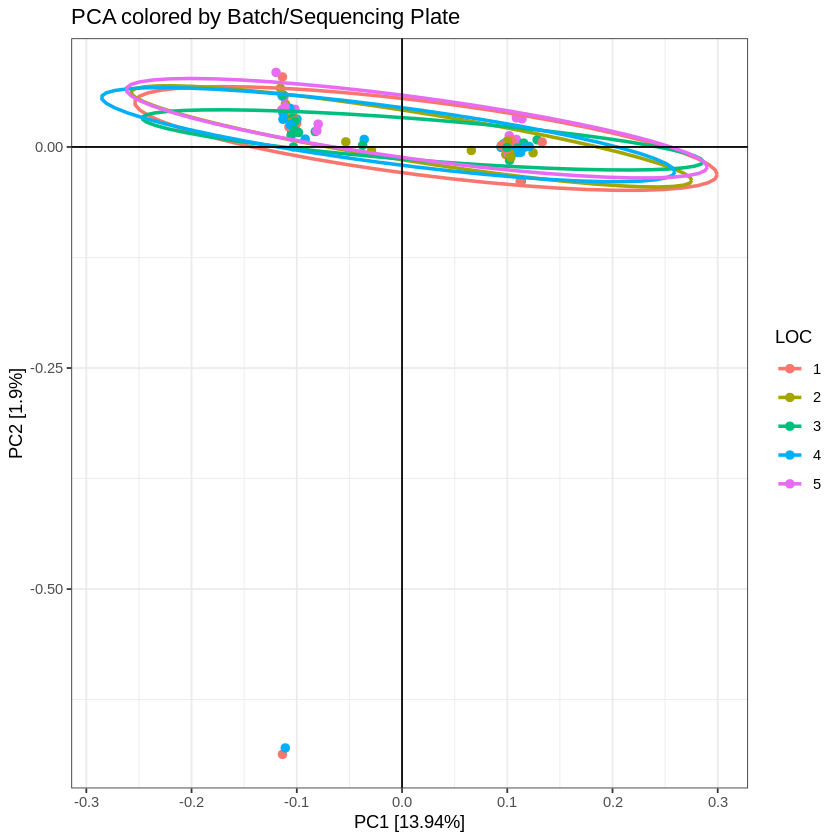

In [6]:
# ** TODO ** Dani to write so we look around different vcfs to make all these plots

gdsfmt::showfile.gds(closeall=TRUE)
filename = "../data/test.gds.rad"
gdsin= SeqArray::seqOpen(filename)
gdsin

# summarize the data 
print(paste0("The number of SAMPLES in data: ", length(c(SeqArray::seqGetData(gdsin, "sample.id")))))
print(paste0("The number of SNPs in data: ",  length(c(SeqArray::seqGetData(gdsin, "variant.id")))))


#**PCA figure of batch effect**  
#You can identify which loci are driving the batch effect by 1) identifying the top PC loadings (SNPs) and/or 2) do an outlier analysis with the batches specified as populations (eg, Bayescan). Both of these methods are most appropriate if you've randomized your samples between batches. If you have not randomized samples but are certain there is a batch effect driving variation in your dataset, you can still remove loci this way but you may also be removing biologically informative loci.  

#pca
# **Method Notes:** Principal components analysis (PCA), as implemented in SeqArray [@zheng2013seqarray] in R (R Core Team, 2018), was used to assess patterns of variation among individuals. For SNPs, where loci were missing data they were imputed by the dosage mean [@patterson2006population].
sample.ids = seqGetData(gdsin, "sample.id")
sample.strata =  read.table("../data/test.metadata.csv", header = T, sep = "\t") %>%
                  dplyr::select(TARGET_ID, STRATA, LONG, LAT, PLATE)
id.order = sapply(sample.ids, function(x,df){which(df$TARGET_ID == x)}, df=sample.strata) #incase your strata file is not in the same order as your vcf
sample.strata.order = sample.strata[id.order,]
#PCA
pca.out = SNPRelate::snpgdsPCA(autosome.only = F, gdsin, num.thread=2, remove.monosnp = T, maf = 0.03)
eig = pca.out$eigenval[!is.na(pca.out$eigenval)]
barplot(100*eig/sum(eig), main="PCA Eigenvalues")
#PLOT PCA
#PC1 v PC2 colored by collection location 
print(
  as.data.frame(pca.out$eigenvect) %>%
      #tibble::add_column(., ID =  sample.ids) %>%
      tibble::add_column(., PLATE =  sample.strata.order$STRATA) %>%
      ggplot(., aes(x=V1, y=V2, color = PLATE))  + #label = ID
      geom_point(size=2) +
      #geom_text() + 
      stat_ellipse(level = 0.95, size = 1) +
      #scale_color_manual(values = gds_colors) +
      geom_hline(yintercept = 0) +
      geom_vline(xintercept = 0) +
      theme_bw() + 
      xlab(paste0("PC1 [",paste0(round(eig[1], 2)), "%]")) + 
      ylab(paste0("PC2 [",paste0(round(eig[2], 2)), "%]")) + 
      ggtitle("PCA Colored by Collection Location")
)
# again, but colored by batch
print(
  as.data.frame(pca.out$eigenvect) %>%
      #tibble::add_column(., ID =  sample.ids) %>%
      tibble::add_column(., LOC =  as.factor(sample.strata.order$PLATE)) %>%
      ggplot(., aes(x=V1, y=V2, color = LOC))  + #label = ID
      geom_point(size=2) +
      #geom_text() + 
      stat_ellipse(level = 0.95, size = 1) +
      #scale_color_manual(values = gds_colors) +
      geom_hline(yintercept = 0) +
      geom_vline(xintercept = 0) +
      theme_bw() + 
      xlab(paste0("PC1 [",paste0(round(eig[1], 2)), "%]")) + 
      ylab(paste0("PC2 [",paste0(round(eig[2], 2)), "%]")) + 
      ggtitle("PCA colored by Batch/Sequencing Plate")
)


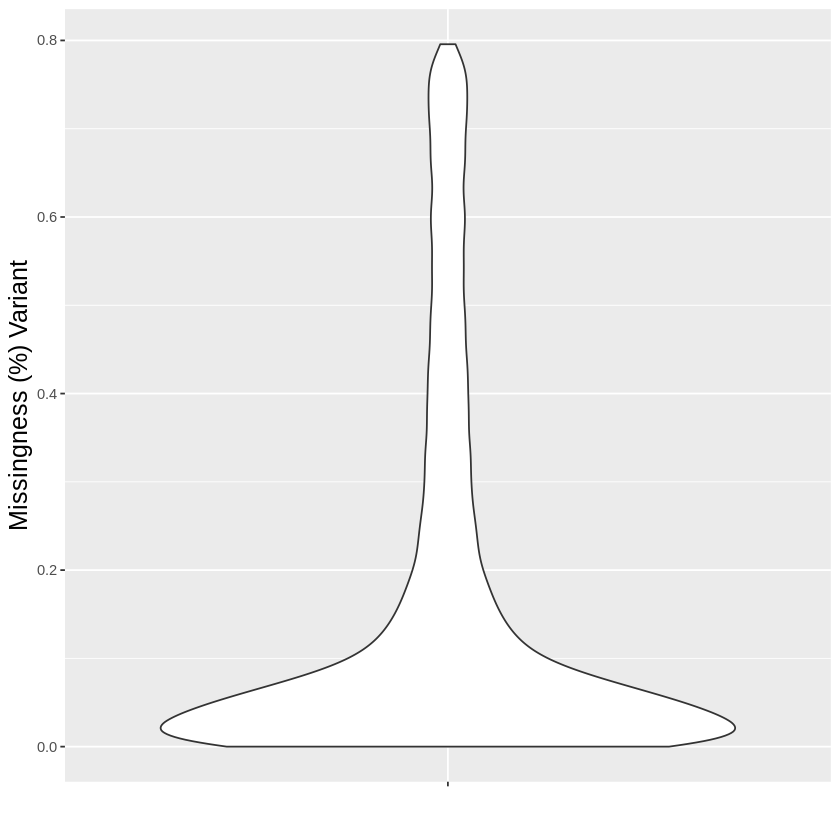

[1] "These samples missinging > 50%: "
[1] "CM051" "CM071" "CM072" "CM077"


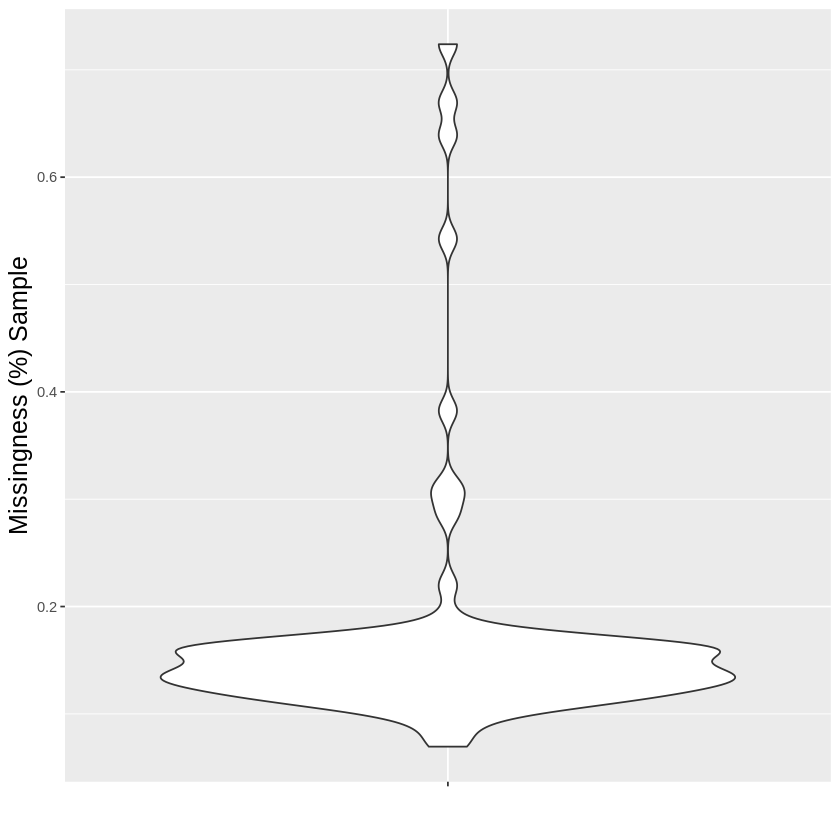

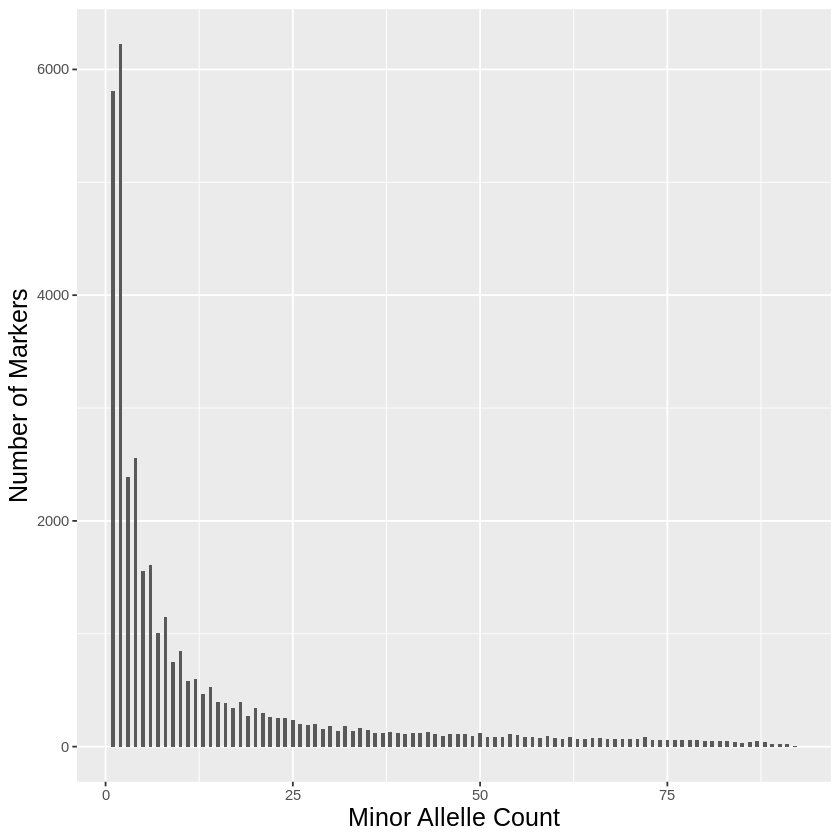

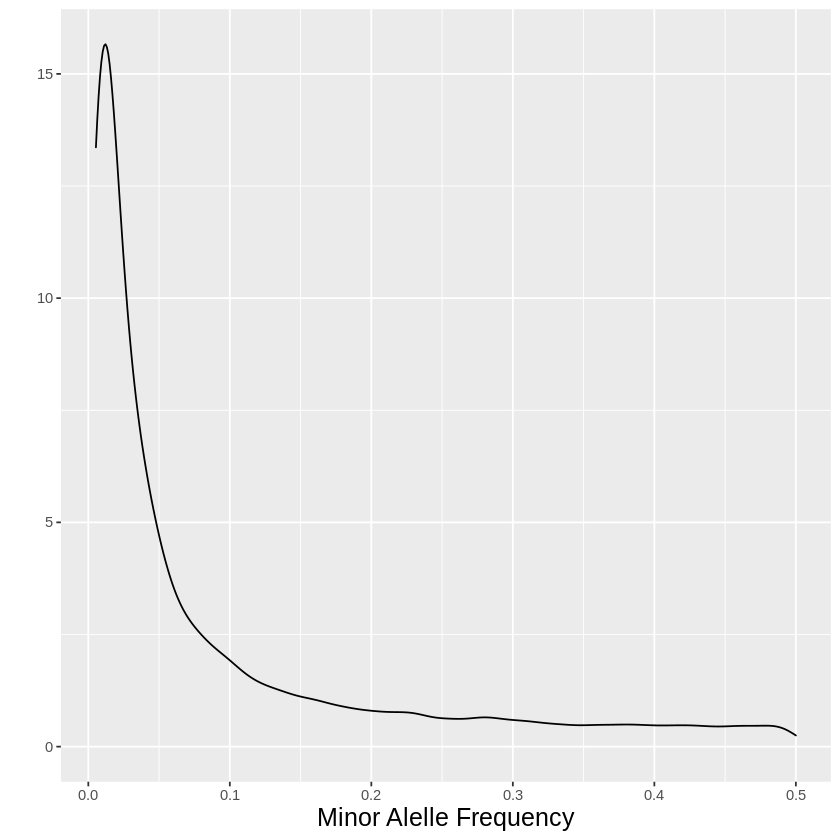

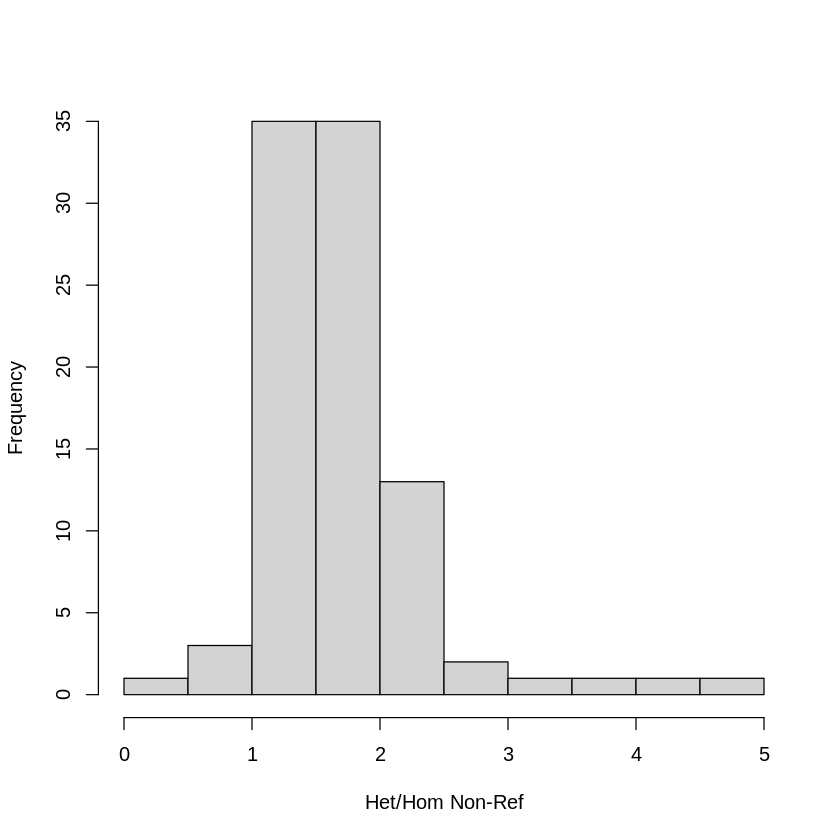

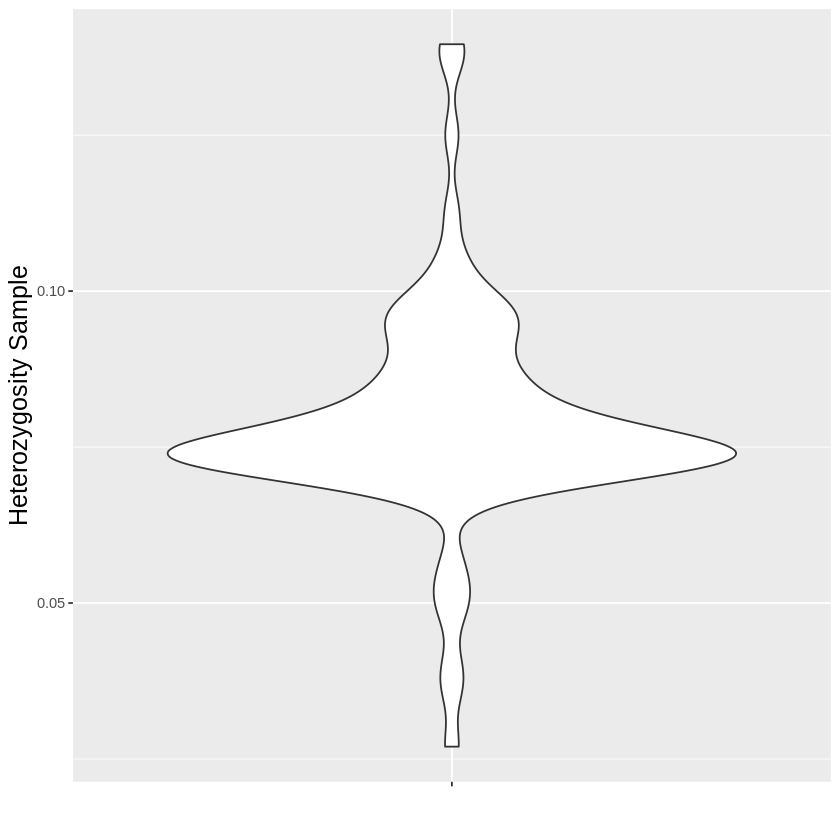

In [21]:


# **TO DO** Dani to write code to identify top PC loading SNPs**
#Once you've identified these batch effect SNPs, it can be useful to [visualize the alignments](#align) before removing them. If the entire alignment for that locus looks wonky, you should remove all SNPs from that RAD locus from your final dataset before conducting analyses.     


# Bad variants ?
# plot missingness of variants 

# **IDEA/TODO** make this sapply to get all the different vcf files from the same list as above? 
miss.var <- SeqVarTools::missingGenotypeRate(gdsin, margin="by.variant")
# plot missingness in variants
print(
ggplot2::ggplot(data.frame(MISS_VAR = miss.var), aes(x = "", y = MISS_VAR)) +
  geom_violin() + 
  labs(y = "Missingness (%) Variant", x = "") + 
  theme(
      legend.position = "none",
      axis.title.x = ggplot2::element_text(size = 15),
      axis.title.y = ggplot2::element_text(size = 15),
      strip.text.x = ggplot2::element_blank()
      )
)

# Bad samples ?
# plot missingness of samples    
miss.sample<- SeqVarTools::missingGenotypeRate(gdsin, margin="by.sample")
miss.sample.df = data.frame(MISS_SAMP=miss.sample)
print(
ggplot2::ggplot(miss.sample.df, aes(x = "", y = MISS_SAMP)) +
  geom_violin() + 
  labs(y = "Missingness (%) Sample", x = "") + 
  theme(
      legend.position = "none",
      axis.title.x = ggplot2::element_text(size = 15),
      axis.title.y = ggplot2::element_text(size = 15),
      strip.text.x = ggplot2::element_blank()
      )
)

print("These samples missinging > 50%: ") 
print(c(SeqArray::seqGetData(gdsin, "sample.id"))[which(miss.sample.df$MISS_SAMP > 0.5)])


#### Calculate the allele frequencies or counts for reference or minor alleles
mac = SeqArray::seqAlleleCount(gdsin, minor = TRUE)
print(
data.frame(mac = mac) %>%
  dplyr::count(mac) %>%
ggplot2::ggplot(., aes(x = mac, y = n)) +
  geom_bar(stat="identity", width=0.5) + 
  labs(y = "Number of Markers", x = "Minor Allelle Count") + 
  theme(
      legend.position = "none",
      axis.title.x = ggplot2::element_text(size = 15),
      axis.title.y = ggplot2::element_text(size = 15),
      strip.text.x = ggplot2::element_blank()
      )
)

#plot MAF 
maf <- SeqArray::seqAlleleFreq(gdsin, minor=TRUE)
print(
data.frame(maf = maf) %>%
ggplot2::ggplot(., aes(x = maf)) +
  geom_density() + 
  labs(y = "", x = "Minor Alelle Frequency") + 
  theme(
      legend.position = "none",
      axis.title.x = ggplot2::element_text(size = 15),
      axis.title.y = ggplot2::element_text(size = 15),
      strip.text.x = ggplot2::element_blank()
      )
)


#### Check contaimination using het/hom ratio
# Compare numbers of heterozygous genotypes and look for high ratios of heterozygous genotypes to homozygous genotypes

# plot heterozygosity
    hethom <- SeqVarTools::hethom(gdsin) # calculates the ratio of heterozygous genotypes to alternate homozygous genotypes by sample. 

    hist(hethom, main="", xlab="Het/Hom Non-Ref")
    het.samp <- SeqVarTools::heterozygosity(gdsin, margin="by.sample")

    print(
    ggplot2::ggplot(data.frame(HET_SAMP = het.samp), aes(x = "", y = HET_SAMP)) +
      geom_violin() + 
      labs(y = "Heterozygosity Sample", x = "") + 
      theme(
          legend.position = "none",
          axis.title.x = ggplot2::element_text(size = 15),
          axis.title.y = ggplot2::element_text(size = 15),
          strip.text.x = ggplot2::element_blank()
          )
    )

## 

In [ ]:
# DART
# get data in a format to work with SeqArray
# if (!require("devtools")) install.packages("devtools")
# devtools::install_github("thierrygosselin/radiator")
# library(radiator)
# tidy_dart = radiator::read_dart(<"your csv here">, strata = <"your tsv strata here (TARGET_ID, INDIVIDUALS, STRATA)">, filename = NULL)
# i.e. 
# tidy_dart = radiator::read_dart("../Data/Report_DCallo20-5523_SNP_mapping_2.csv", strata = "../STRATA/Sample_Info.tsv", filename = NULL)